# Алёшин Александр 
# ИУ5-83Б
# Вариант 1 

# Лабораторная работа 6. Метод квазиэквивалентного укрупнения состояний многомерных марковских процессов размножения-гибели
## Задание 1.
$K$ программистов могут писать программы для выполнения на одном из $M$ серверов, при этом программа не попадает сразу на сервер, а обрабатывается на одном из $N$ специальных компьютеров, которые проверяют отсутствие вирусов. 

Интенсивность работы программистов $\lambda$, интенсивность работы компьютеров-антивирусов $\nu$, интенсивность работы основных серверов $\mu$, программа оказывается с вирусом с вероятностью $p$. 
Если программа с вирусом, она получает отказ обслуживания на основных серверах. Для компьютеров по проверке вирусов имеется ограничение по длине очереди $m_1$, для основных серверов ограничение по длине очереди $m_2$.

    - Нарисовать граф состояний системы, учитывая количество программистов, которые пишут программу, количество программ на компьютерах-антивирусах, количество программ на серверах;
    - Написать уравнения Колмогорова для вероятностей состояний, финальных вероятностей;
    - Тремя способами (экспериментально, методом укрупнения состояний, по уравнениям Колмогорова) найти основные 
    характеристики эффективности СМО: среднее время пребывания заявки в системе, абсолютную пропускную способность, среднее число заявок в системе.

In [3]:
Variant<-1
set.seed(Variant) 
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)
data.frame(K,M,N,lambda,mu,nu,p,m1,m2)

K,M,N,lambda,mu,nu,p,m1,m2
3,3,1,0.2016819,0.8983897,0.9446753,0.6607978,2,2


# 1. Граф состояний 
$S_{k,m1,n,m2,m}\\$
$k$ - кол-во программистов

$m_1$ - очередь на проверку вирусов

$n$ - кол-во проверяющих компьютеров

$m_2$ - очередь для серверов

$m$ - кол-во серверов

$k = 3$

$m = 3$

$n = 1$

$m_1 = 2$

$m_2 = 2$

$\lambda = a$ - интенсивность подготовки программы программистом

$\mu$ - интенсивность работы серверов

$p$ - вероятность вируса

$\nu$ - интенсивность работы компьютеров

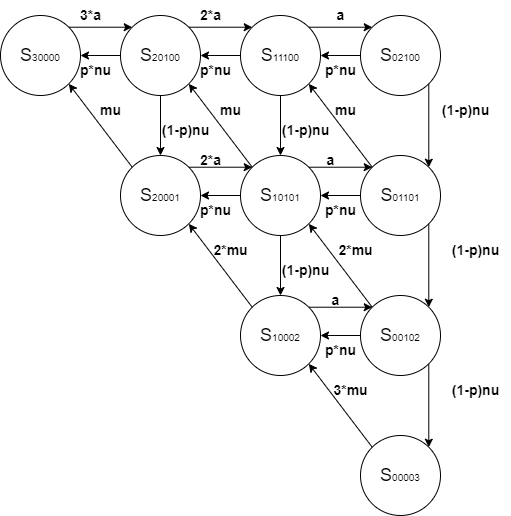

 # Уравнения Колмогорова
 \begin{cases}
 \frac{dP_{30000}(t)}{dt}=-3\lambda\cdot P_{30000}+p\nu\cdot P_{20100}+\mu\cdot P_{20001}\\
 \frac{dP_{20100}(t)}{dt}=-2\lambda\cdot P_{20100}-(1-p)\nu\cdot P_{20100}-p\nu\cdot P_{20100}+3\lambda\cdot P_{30000}+p\nu\cdot P_{11100}+\mu\cdot P_{10101}\\
 \frac{dP_{11100}(t)}{dt}=-\lambda\cdot P_{11100}-(1-p)\nu\cdot P_{11100}-p\nu\cdot P_{11100}+p\nu\cdot P_{02100}+\mu\cdot P_{01101}+2\lambda\cdot P_{20100}\\
 \frac{dP_{02100}(t)}{dt}=-(1-p)\nu\cdot P_{02100}-p\nu\cdot P_{02100}+\lambda\cdot P_{11100}\\
 \frac{dP_{20001}(t)}{dt}=-\mu\cdot P_{20001}-2\lambda\cdot P_{20001}+(1-p)\nu\cdot P_{20100}+p\nu\cdot P_{10101}+2\mu\cdot P_{10002}\\
 \frac{dP_{10101}(t)}{dt}=-\lambda\cdot P_{10101}-(1-p)\nu\cdot P_{10101}-p\nu\cdot P_{10101}-\mu\cdot P_{10101}+(1-p)\nu\cdot P_{11100}+p\nu\cdot P_{01101}+2\mu\cdot P_{00102}+2\lambda\cdot P_{20001}\\
 \frac{dP_{01101}(t)}{dt}=-\mu\cdot P_{01101}-(1-p)\nu\cdot P_{01101}-p\nu\cdot P_{01101}+\lambda\cdot P_{10101}+(1-p)\nu\cdot P_{02100}\\
 \frac{dP_{10002}(t)}{dt}=-2\mu\cdot P_{10002}-\lambda\cdot P_{10002}+(1-p)\nu\cdot P_{10101}+p\nu\cdot P_{00102}+3\mu\cdot P_{00003}\\
 \frac{dP_{00102}(t)}{dt}=-2\mu\cdot P_{00102}-(1-p)\nu\cdot P_{00102}-p\nu\cdot P_{00102}+(1-p)\nu\cdot P_{01101}+\lambda\cdot P_{10002}\\
 \frac{dP_{00003}(t)}{dt}=-3\mu\cdot P_{00003}+(1-p)\nu\cdot P_{00102}\\
 \end{cases}

Значения $P$ при $t \rightarrow \infty $:

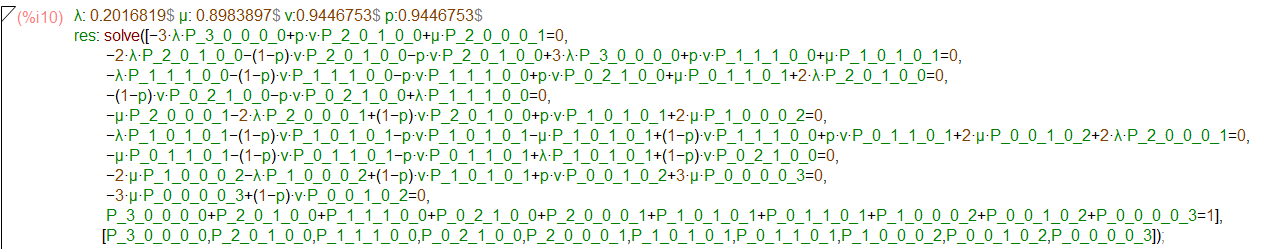
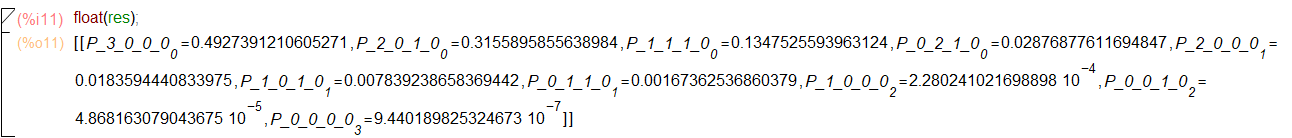

In [2]:
S<-data.frame(P30000=0.4927391210605271, P20100=0.3155895855638984, P11100=0.1347525593963124, P02100=0.02876877611694847,
              P20001=0.0183594440833975, P10101=0.007839238658369442, P01101=0.00167362536860379, P10002=2.280241021698898*10^(-4),
             P00102=4.868163079043675*10^(-5), P00003=9.440189825324673*10^(-7))

### Среднее число заявок в системе: 
$L_{сист}=0 \cdot P_{30000} + 1 \cdot (P_{20100}+P_{20001}) + 2 \cdot (P_{11100}+P_{10101}+P_{10002}) + 3 \cdot (P_{02100}+P_{01101}+P_{00102}+P_{00003}) $

In [4]:
L_syst<-(S$P20100+S$P20001)+2*(S$P11100+S$P10101+S$P10002)+3*(S$P02100+S$P01101+S$P00102+S$P00003)
L_syst

[1] 0.7110648

### Среднее число занятых каналов: 

$L_{зан} = 1 \cdot (P_{20001}+P_{10101}+P_{01101})+2 \cdot (P_{10002}+P_{00102})+3 \cdot P_{00003} $

In [5]:
L_busy <- 1*(S$P20001+S$P10101+S$P01101)+2*(S$P10002+S$P00102)+3*S$P00003
L_busy

[1] 0.02842855

### Абсолютная пропускная способность: 

$ \lambda'=L_{зан}\cdot\mu=0.0279471750339998 $

In [6]:
A <- L_busy * mu
A

[1] 0.02794718

### Средняя интенсивность суммарного входного потока: 

$ \Lambda = (K - L_{сист})\cdot\lambda = 1.26474370492891 $

In [7]:
A_inp <- (K - L_syst) * lambda
A_inp

[1] 1.264744

### Срденее время пребывания заявки в системе: 

$ T_{сист} = \frac{L_{сист}}{\Lambda} = 0.562220434540089 $

In [8]:
T_syst <- L_syst / A_inp
T_syst

[1] 0.5622204

# 2) Метод укрепления состояний

Предложим декомпозицию нашей задачи в виде двух моделей. В первой модели совокупность серверов и компьютеров по проверке наличия вирусов заменим только одним обобщенный параметром - интенсивностью обслуживания $\mu_{общ}$. Тогда модель будет обычной моделью рождения гибели для замкнутой системы:
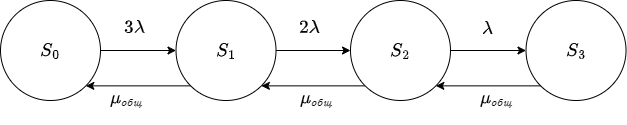

$$
P_0 = \left(1+\frac{3\lambda}{\mu_{общ}} + \frac{3\cdot2\lambda^2}{\mu_{общ}^2}+...+\frac{3!\lambda^3}{\mu_{общ}^3}\right)^{-1}\\
P_1 = P_0\frac{3\lambda}{\mu_{общ}}\\
P_2 = P_0\frac{3\cdot2\cdot\lambda^2}{\mu_{общ}^2}\\
...\\
L_{сист}=\sum_{k=1}^3 k\cdot P_k\\
T_{сист} = \frac{L_{сист}}{\lambda(3-L_{сист})}
$$

Во второй модели будем считать, что в системе постоянно циркулируют $L_{сист}$ заявок. В качестве состояний системы возьмем количество заявок, обрабатываемых на основных серверах:
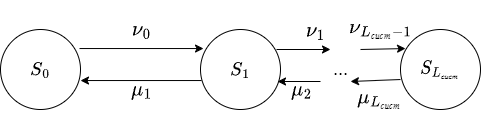
$$
\nu_n = (1-p)\nu\cdot \text{min}(N,L_{сист}-n),\quad n=0,...,L_{сист}-1\\
\mu_n = \mu\cdot\text{min}(M,n),\quad n=1,2,..,L_{сист}\\
\pi_0=\left(1+\frac{\nu_0}{\mu_1}+\frac{\nu_0\nu_1}{\mu_1\mu_2}+...\right)^{-1}\\
\pi_1 = \pi_0\cdot\frac{\nu_0}{\mu_1}\\
\pi_2= \pi_0\cdot\frac{\nu_0\nu_1}{\mu_1\mu_2}\\
...\\
\mu_{общ}=\sum_{n=1}^{L_{сист}}\pi_n\cdot\mu_n
$$

In [9]:
results <- data.frame(L_syst = numeric(2), A_new = numeric(2), T_syst = numeric(2))
results[1, ] <- c(L_syst, A_inp, T_syst)
colnames(results) <- c("Среднее число заявок в системе", "Абсолютная пропускная способность", "Срденее время пребывания заявки в системе")
rownames(results) <- c("уравнения Колмогорова", "метод укрупнения состояний")

L_syst <- 1
getNu <- function(n) {
  return((1-p)*nu*min(N, L_syst - n))
}
getMu <- function(n) {
  return(mu * min(M, n))
}
getTop <- function(n) {
  top <- 1
  for (i in 1:n) {
    top <- top * getNu(i - 1)
  }
  return(top)
}
getBottom <- function(n) {
  bottom <- 1
  for (i in 1:n) {
    bottom <- bottom * getMu(i)
  }
  return(bottom)
}

for (indx in 1:10-0) {
  
  pi_0 <- 1
  for (i in 1:L_syst) {
    pi_0 <- pi_0 + getTop(i) / getBottom(i)
  }
  pi_0 <- 1 / pi_0
  pi <- c()
  for (i in 1:L_syst) {
    pi <- c(pi, pi_0 * getTop(i) / getBottom(i))
  }
  
  mu_o <- 0
  for (i in 1:L_syst) {
    mu_o <- mu_o + pi[i] * getMu(i)
  }
  
  P_0 <- 1
  for (i in 1:K) {
    P_0 <- P_0 +  factorial(K) / factorial(K - i) * lambda^i / mu_o^i
  }
  P_0 <- 1 / P_0
  P <- c()
  for (i in 1:K) {
    P <- c(P, P_0 * factorial(K) / factorial(K - i) * lambda^i / mu_o^i)
  }
  L_syst <- 0
  for (i in 1:K) {
    L_syst <- L_syst + i * P[i]
  }
}

T_syst <- L_syst / (lambda * (K - L_syst))

results[2, ] <- c(L_syst, mu_o, T_syst)
results

,Среднее число заявок в системе,Абсолютная пропускная способность,Срденее время пребывания заявки в системе
уравнения Колмогорова,0.7110648,1.26474370,0.5622204
метод укрупнения состояний,2.8306703,0.09362668,30.2542938


# 3) Экспериментальный расчет

In [12]:
library(methods)

setClass("state", slots = list(antivirusBusy = "numeric", serversBusy = "numeric", programmersWriting = "numeric", antivirusQueue = "numeric", serverQueue = "numeric"))

setClass("event", slots = list(type = "character", time = "numeric", meta = "ANY"))
getEventTime <- function(events) {
  ret <- c()
  for (i in events) {
    ret <- c(ret, i@time)
  }
  return(ret)
}

events <- c()
currentTime <- 0
Iterations <- 10000

state <- new("state", antivirusBusy = 0, serversBusy = 0, programmersWriting = K, antivirusQueue = 0, serverQueue = 0)

createEvent <- function(events, type, time) {
  return(c(events, new("event", type = type, time = currentTime + time, meta = NULL)))
}

P <- new.env(hash = TRUE, parent = emptyenv(), size = NA)
calculateP <- function(state) {
  key <- paste(state@programmersWriting, state@antivirusBusy, state@serversBusy, state@antivirusQueue, state@serverQueue, sep = ",")
  if (is.null(P[[key]])) P[[key]] <- 1
  else P[[key]] <- P[[key]] + 1
}
calculateP(state)

for (i in 1:K) {
  events <- createEvent(events, "programCreated", rexp(1, lambda))
}

amount <- 0

for (i in 1:Iterations) {
  
  events <- events[order(getEventTime(events))]
  event <- events[[1]]
  events <- events[-1]
  currentTime <- event@time
  
  if (event@type == "programCreated") {
    state@programmersWriting <- state@programmersWriting - 1
    if (state@antivirusBusy < N) {
      state@antivirusBusy <- state@antivirusBusy + 1
      events <- createEvent(events, "antivirusDone", rexp(1, nu))
    }
    else if (state@antivirusQueue < m1) {
      state@antivirusQueue <- state@antivirusQueue + 1
    }
    else {
      amount <- amount + 1
      state@programmersWriting <- state@programmersWriting + 1
      events <- createEvent(events, "programCreated", rexp(1, lambda))
    }
  }
  else if (event@type == "antivirusDone") {
    state@antivirusBusy <- state@antivirusBusy - 1
    if (runif(1) <= p) {
      amount <- amount + 1
      events <- createEvent(events, "programCreated", rexp(1, lambda))
      state@programmersWriting <- state@programmersWriting + 1
    }
    else if (state@serversBusy < M) {
      state@serversBusy <- state@serversBusy + 1
      events <- createEvent(events, "serverDone", rexp(1, mu))
    }
    else if (state@serverQueue < m2) {
      state@serverQueue <- state@serverQueue + 1
    }
    else {
      amount <- amount + 1
      events <- createEvent(events, "programCreated", rexp(1, lambda))
      state@programmersWriting <- state@programmersWriting + 1
    }
    
    if (state@antivirusQueue > 0) {
      state@antivirusQueue <- state@antivirusQueue - 1
      state@antivirusBusy <- state@antivirusBusy + 1
      events <- createEvent(events, "antivirusDone", rexp(1, nu))
    }
  }
  else if (event@type == "serverDone") {
    amount <- amount + 1
    state@serversBusy <- state@serversBusy - 1
    events <- createEvent(events, "programCreated", rexp(1, lambda))
    state@programmersWriting <- state@programmersWriting + 1
    
    if (state@serverQueue > 0) {
      state@serverQueue <- state@serverQueue - 1
      state@serversBusy <- state@serversBusy + 1
      events <- createEvent(events, "serverDone", rexp(1, mu))
    }
  }
  
  calculateP(state)
}

F <- new.env(hash = TRUE, parent = emptyenv(), size = NA)
for (i in ls(P)) {
  F[[gsub(",","",i)]] <- P[[i]] / (Iterations + 1)
}

L_syst_n <- F[["20100"]] + F[["20001"]] + 2 * (F[["11100"]] + F[["10101"]] + F[["10002"]]) + 3 * (F[["02100"]] + F[["01101"]] + F[["00102"]] + F[["00003"]])
a_new_n <- amount / currentTime
                                                                                                                                                                           
results <- rbind(results, "эксперимент" = c(L_syst_n, a_new_n, L_syst_n / a_new_n))
results

,Среднее число заявок в системе,Абсолютная пропускная способность,Срденее время пребывания заявки в системе
уравнения Колмогорова,0.7110648,1.26474370,0.5622204
метод укрупнения состояний,2.8306703,0.09362668,30.2542938
эксперимент,0.7731261,0.77312605,0.7731261
эксперимент1,0.7812447,0.78124475,0.7812447
эксперимент2,0.7854919,0.78549185,0.7854919
